In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
### Reading and understanding the data

pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", None)

In [4]:
telecom_df = pd.read_csv("telecom_churn_data.csv")

In [5]:
telecom_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [6]:
telecom_df.shape

(99999, 226)

In [7]:
telecom_df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [8]:
numeric_columns = telecom_df.describe().columns
numeric_columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=214)

In [9]:
#This is to understand how many columns are numeric
telecom_df.describe().shape

(8, 214)

In [10]:
#Identifying columns which are having missing values of >70%
missing_70_columns = telecom_df.columns[(telecom_df.isnull().sum())*100/telecom_df.shape[0] >= 70]

In [11]:
missing_70_columns

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
       'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9'],
      dtype='object')

### From below we can see that if date_of_last_rech_data_* has null we can impute relevant columns with 0. We can also verify if the percent of missing values once imputation is done


In [12]:
telecom_df[telecom_df.isnull() == True].loc[:,['date_of_last_rech_data_6','total_rech_data_6', 'max_rech_data_6',
                                                                   'count_rech_2g_6','count_rech_3g_6','av_rech_amt_data_6','arpu_2g_6',
                                                                   'arpu_3g_6','night_pck_user_6','fb_user_6']].sum()

date_of_last_rech_data_6      0
total_rech_data_6           0.0
max_rech_data_6             0.0
count_rech_2g_6             0.0
count_rech_3g_6             0.0
av_rech_amt_data_6          0.0
arpu_2g_6                   0.0
arpu_3g_6                   0.0
night_pck_user_6            0.0
fb_user_6                   0.0
dtype: object

In [13]:
month_cols = ['6', '7','8','9']

In [14]:
for i in month_cols:
    telecom_df['date_of_last_rech_data_'+i] = telecom_df['date_of_last_rech_data_'+i].fillna(0)

In [15]:
# Verifying the above operation
telecom_df['date_of_last_rech_data_6'].head()

0    6/21/2014
1            0
2            0
3            0
4     6/4/2014
Name: date_of_last_rech_data_6, dtype: object

In [16]:
recharge_cols = ['total_rech_data_', 'max_rech_data_','count_rech_2g_','count_rech_3g_','av_rech_amt_data_','arpu_2g_',
                                                                   'arpu_3g_','night_pck_user_','fb_user_']

In [17]:
# Just checking what max() or min() returns for comparison later
print(telecom_df['av_rech_amt_data_6'].min())
print(telecom_df['av_rech_amt_data_6'].max())

1.0
7546.0


In [18]:
telecom_df.loc[telecom_df['date_of_last_rech_data_6'] == 0, 'av_rech_amt_data_6'].max()

nan

In [19]:
for i in month_cols:
    for j in recharge_cols:
        telecom_df.loc[telecom_df['date_of_last_rech_data_'+i] == 0, j+i] = 0

In [20]:
print(telecom_df['av_rech_amt_data_6'].min())
print(telecom_df['av_rech_amt_data_6'].max())

0.0
7546.0


In [21]:
# Cross checking above instructions result
telecom_df.loc[telecom_df['date_of_last_rech_data_6']==0,['total_rech_data_6', 'max_rech_data_6',
                                                                   'count_rech_2g_6','count_rech_3g_6','av_rech_amt_data_6','arpu_2g_6',
                                                                   'arpu_3g_6','night_pck_user_6','fb_user_6']].head(5)

,total_rech_data_6,max_rech_data_6,count_rech_2g_6,count_rech_3g_6,av_rech_amt_data_6,arpu_2g_6,arpu_3g_6,night_pck_user_6,fb_user_6
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
telecom_df.shape

(99999, 226)

In [23]:
telecom_df['date_of_last_rech_data_7'].isna().sum()

0

In [24]:
(round(100*(telecom_df.isnull().sum()/len(telecom_df)), 2).sort_values(ascending=False) > 25).head()

loc_og_t2m_mou_9    False
loc_ic_t2m_mou_9    False
std_og_t2m_mou_9    False
std_ic_t2f_mou_9    False
roam_ic_mou_9       False
dtype: bool

In [25]:
for k in list(telecom_df.columns):
    if 'loc_og' in k:
        print(k)

loc_og_t2o_mou
loc_og_t2t_mou_6
loc_og_t2t_mou_7
loc_og_t2t_mou_8
loc_og_t2t_mou_9
loc_og_t2m_mou_6
loc_og_t2m_mou_7
loc_og_t2m_mou_8
loc_og_t2m_mou_9
loc_og_t2f_mou_6
loc_og_t2f_mou_7
loc_og_t2f_mou_8
loc_og_t2f_mou_9
loc_og_t2c_mou_6
loc_og_t2c_mou_7
loc_og_t2c_mou_8
loc_og_t2c_mou_9
loc_og_mou_6
loc_og_mou_7
loc_og_mou_8
loc_og_mou_9


In [26]:
telecom_df.loc[telecom_df['date_of_last_rech_data_6']==0,['total_rech_data_6', 'max_rech_data_6',
                                                                   'count_rech_2g_6','count_rech_3g_6','av_rech_amt_data_6','arpu_2g_6',
                                                                   'arpu_3g_6','night_pck_user_6','fb_user_6']].head(5)

,total_rech_data_6,max_rech_data_6,count_rech_2g_6,count_rech_3g_6,av_rech_amt_data_6,arpu_2g_6,arpu_3g_6,night_pck_user_6,fb_user_6
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
for i in month_cols:
    for j in recharge_cols:
        telecom_df[j+i] = telecom_df[j+i].fillna(0)

In [28]:
telecom_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [29]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [30]:
for i in telecom_df.columns:
    if 'date' in i:
        print(i)
        telecom_df.drop(i, inplace=True, axis=1)

last_date_of_month_6
last_date_of_month_7
last_date_of_month_8
last_date_of_month_9
date_of_last_rech_6
date_of_last_rech_7
date_of_last_rech_8
date_of_last_rech_9
date_of_last_rech_data_6
date_of_last_rech_data_7
date_of_last_rech_data_8
date_of_last_rech_data_9


In [31]:
(round(100*(telecom_df.isnull().sum()/len(telecom_df)), 2).sort_values(ascending=False)).head()

std_ic_t2t_mou_9    7.75
loc_og_t2c_mou_9    7.75
loc_ic_t2t_mou_9    7.75
std_og_mou_9        7.75
loc_ic_t2m_mou_9    7.75
dtype: float64

In [32]:
#Dropping mobile number since it is unique and it won't add much pattern to the modeling
telecom_df.drop('mobile_number', axis=1, inplace=True)

In [33]:
telecom_df.head(2)

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,109,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.0,212.17,212.17,212.17,0.0,212.17,212.17,212.17,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,0.0,968,30.4,0.0,101.2,3.58
1,109,0.0,0.0,0.

In [34]:
null_columns = telecom_df.columns[telecom_df.isnull().sum() > 0]

In [35]:
#imputing null value columns with mean() since it has usage values
for k in null_columns:
    telecom_df[k].fillna(telecom_df[k].mean(), inplace=True)
    

In [36]:
(telecom_df.isnull().sum()*100/telecom_df.shape[0]).sort_values(ascending=False).head()

circle_id           0.0
total_rech_num_8    0.0
total_rech_amt_6    0.0
total_rech_amt_7    0.0
total_rech_amt_8    0.0
dtype: float64

In [37]:
recharge_data = telecom_df.columns[telecom_df.columns.str.contains('rech')]
month6 = telecom_df[recharge_data].columns[telecom_df[recharge_data].columns.str.contains('6')]
telecom_df[month6].head()

,total_rech_num_6,total_rech_amt_6,max_rech_amt_6,total_rech_data_6,max_rech_data_6,count_rech_2g_6,count_rech_3g_6,av_rech_amt_data_6
0,4,362,252,1.0,252.0,0.0,1.0,252.0
1,4,74,44,0.0,0.0,0.0,0.0,0.0
2,5,168,86,0.0,0.0,0.0,0.0,0.0
3,10,230,60,0.0,0.0,0.0,0.0,0.0
4,5,196,56,1.0,56.0,1.0,0.0,56.0


In [38]:
# Addition of data recharge to the call recharge 
telecom_df['data_and_rech_6'] = (telecom_df.total_rech_data_6 * telecom_df.av_rech_amt_data_6) + telecom_df.total_rech_amt_6
telecom_df['data_and_rech_7'] = (telecom_df.total_rech_data_7 * telecom_df.av_rech_amt_data_7) + telecom_df.total_rech_amt_7

In [39]:
# Average recharge amount for good phase. Good phase is in 6th and 7th month
telecom_df['avg_rech_amt'] = (telecom_df['data_and_rech_6'] + telecom_df['data_and_rech_7']) / 2
top_70_recharge = np.percentile(telecom_df['avg_rech_amt'].values, 70)
top_70_recharge

478.0

In [40]:
high_value_cust = telecom_df.copy()
high_value_cust = telecom_df[high_value_cust['avg_rech_amt'] >= top_70_recharge]

In [41]:
high_value_cust.shape

(30001, 216)

In [42]:
def churn_usage(cusage):
    if((cusage['total_ic_mou_9'] == 0) & (cusage['total_og_mou_9'] == 0) & (cusage['vol_2g_mb_9'] == 0) & (cusage['vol_3g_mb_9'] == 0)):
        return 1
    else:
        return 0

In [43]:
high_value_cust['churn'] = high_value_cust.apply(churn_usage, axis=1)

In [44]:
high_value_cust['churn'].value_counts(normalize=True)

0    0.918636
1    0.081364
Name: churn, dtype: float64

### We can notice that churn customers are only 8%. It is indicating that target columns is imbalanced.

In [45]:
# Dropping the fields related to 9th month data
for l in high_value_cust.columns:
    if '_9' in l:
        high_value_cust.drop(l, axis=1, inplace=True)

In [46]:
high_value_cust.shape

(30001, 166)

In [47]:
high_value_cust.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,data_and_rech_6,data_and_rech_7,avg_rech_amt,churn
0,109,0.0,0.0,0.0,197.385,214.816,213.803,132.395875,133.670805,0.00,197.935577,197.045133,0.00,9.950013,7.149898,0.00,13.911337,9.818732,0.00,47.100763,46.47301,0.00,93.342088,91.397131,0.00,3.751013,3.792985,0.00,1.123056,1.3685,0.00,144.201175,141.670476,0.00,79.82987,83.299598,0.00,87.299624,90.804137,0.00,1.129011,1.11501,0.00,0.0,0.0,0.0,168.261218,175.221436,0.00,0.798277,0.776572,0.00,3.916811,4.978279,0.00,0.454157,0.030235,0.0,0.00,0.00,0.00,47.922365,47.99052,0.16,107.47565,107.120493,4.13,12.084305,12.599697,1.15,167.491059,167.71954,5.44,9.575993,10.011904,0.00,20.72224,21.656415,0.00,2.156397,2.216923,0.00,0.0,0.0,0.0,32.457179,33.887833,0.00,0.00,0.00,5.44,0.061557,0.033585,0.0,7.460608,8.334936,0.00,0.854656,1.01296,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,614.0,504.0,559.0,1
7,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.840000,54.680000,52.29,453.430000,567.160000,325.91,16.230000,33.490000,31.64,23.740000,12.590000,38.06,51.390000,31.38000,40.28,308.630000,447.380000,162.28,62.130000,55.140000,53.23,0.000000,0.0000,0.00,422.160000,533.910000,255.79,4.30000,23.290000,12.01,49.890000,31.760000,49.14,6.660000,20.08000,16.68,0.0,0.0,0.0,60.860000,75.140000,77.84,0.000000,0.180000,10.01,4.500000,0.000000,6.50,0.000000,0.000000,0.0,487.53,609.24,350.16,58.140000,32.26000,27.31,217.56000,221.490000,121.19,152.160000,101.460000,39.53,427.8

### EDA

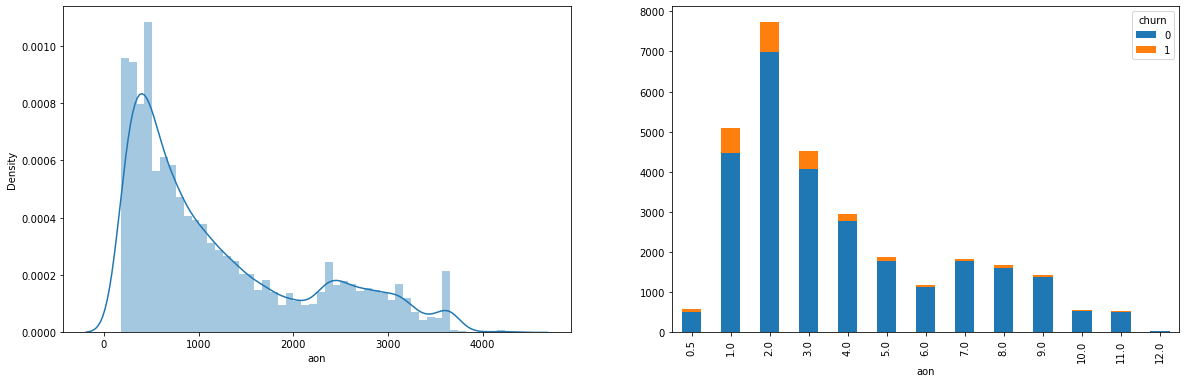

In [48]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20, 6))

# distr plot for aon(age of network)
sns.distplot(high_value_cust['aon'], ax=ax1)

bins = [0, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
labels = [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

churn_plt = pd.crosstab(pd.cut(round(((high_value_cust['aon']/30)/12),1), bins = bins, labels = labels ), high_value_cust['churn'])
churn_plt.plot(kind='bar', stacked=True, ax = ax2)
plt.show()


We can note that churn rate is more during first to 4 years of network usage

In [49]:
# EDA for incoming call attributes

igcalls_col = [['loc_ic_mou_6','std_ic_mou_6','isd_ic_mou_6','roam_ic_mou_6','spl_ic_mou_6','ic_others_6','total_ic_mou_6'],
        ['loc_ic_mou_7','std_ic_mou_7','isd_ic_mou_7','roam_ic_mou_7','spl_ic_mou_7','ic_others_7','total_ic_mou_7'],
        ['loc_ic_mou_8','std_ic_mou_8','isd_ic_mou_8','roam_ic_mou_8','spl_ic_mou_8','ic_others_8','total_ic_mou_8']]

In [50]:
for i in range(0,3):
    display(high_value_cust[igcalls_col[i]].describe())

,loc_ic_mou_6,std_ic_mou_6,isd_ic_mou_6,roam_ic_mou_6,spl_ic_mou_6,ic_others_6,total_ic_mou_6
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,234.196428,47.379053,10.920219,16.291107,0.062154,1.168975,289.950496
std,313.378483,137.369089,76.716716,76.275558,0.187875,13.985120,365.523475
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52.640000,1.410000,0.000000,0.000000,0.000000,0.000000,72.880000
50%,143.030000,12.680000,0.000000,0.000000,0.000000,0.000000,183.730000
75%,297.140000,41.490000,0.000000,0.000000,0.000000,0.100000,371.990000
max,7454.630000,5459.630000,6789.410000,2613.310000,19.760000,1344.140000,7716.140000


,loc_ic_mou_7,std_ic_mou_7,isd_ic_mou_7,roam_ic_mou_7,spl_ic_mou_7,ic_others_7,total_ic_mou_7
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,237.309491,49.652686,12.024986,12.770483,0.020366,1.518469,296.756987
std,314.548137,148.028384,80.164828,75.770480,0.181848,15.996170,373.747232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,57.790000,1.430000,0.000000,0.000000,0.000000,0.000000,78.990000
50%,145.530000,13.430000,0.000000,0.000000,0.000000,0.000000,187.580000
75%,298.710000,43.810000,0.000000,0.000000,0.000000,0.050000,377.310000
max,6466.740000,6745.760000,4747.910000,3813.290000,21.330000,1495.940000,7442.860000


,loc_ic_mou_8,std_ic_mou_8,isd_ic_mou_8,roam_ic_mou_8,spl_ic_mou_8,ic_others_8,total_ic_mou_8
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,229.816655,45.699065,11.328610,12.785940,0.028147,1.262445,279.922931
std,305.264815,138.546919,70.568143,74.090633,0.110595,12.780985,361.175175
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.780000,1.030000,0.000000,0.000000,0.000000,0.000000,61.360000
50%,146.390000,11.930000,0.000000,0.000000,0.000000,0.000000,173.110000
75%,285.440000,38.380000,0.030000,0.000000,0.000000,0.130000,361.730000
max,5388.740000,5957.140000,3432.880000,4169.810000,6.230000,1209.860000,6066.630000


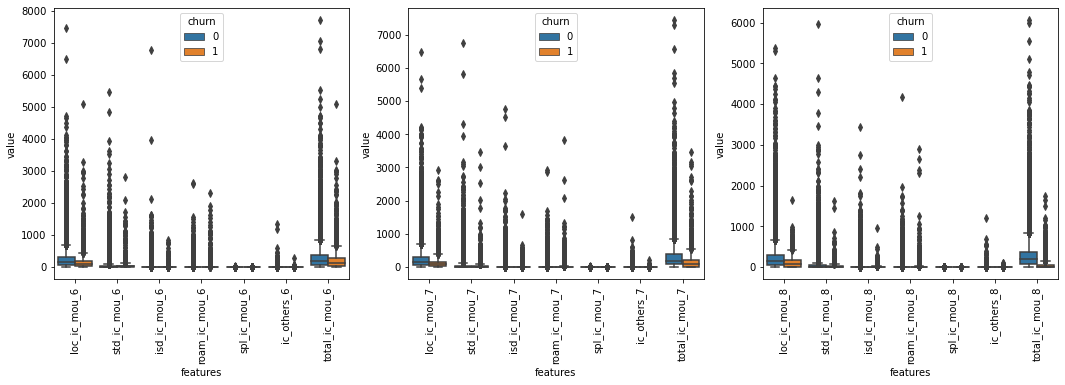

In [51]:
plt.figure(figsize=(18, 5))
for i in range(0,3):
    plt.subplot(1,3,i+1)
    X = pd.concat([high_value_cust[igcalls_col[i]], high_value_cust['churn']], axis=1)
    X = pd.melt(X,id_vars="churn",var_name="features",value_name='value')
    sns.boxplot(x="features", y="value", hue="churn", data=X)
    plt.xticks(rotation=90)    

In [52]:
# EDA for outgoing calls

ogcalls_col = [['loc_og_mou_6','std_og_mou_6','isd_og_mou_6','roam_og_mou_6','spl_og_mou_6','og_others_6','total_og_mou_6'],
        ['loc_og_mou_7','std_og_mou_7','isd_og_mou_7','roam_og_mou_7','spl_og_mou_7','og_others_7','total_og_mou_7'],
        ['loc_og_mou_8','std_og_mou_8','isd_og_mou_8','roam_og_mou_8','spl_og_mou_8','og_others_8','total_og_mou_8']]

In [53]:
for i in range(0,3):
    display(high_value_cust[ogcalls_col[i]].describe())



,loc_og_mou_6,std_og_mou_6,isd_og_mou_6,roam_og_mou_6,spl_og_mou_6,og_others_6,total_og_mou_6
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,256.699956,350.182599,2.186027,26.824261,5.889423,0.669342,609.866251
std,377.067811,607.299066,45.851627,116.162582,17.551451,4.107080,690.873430
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.980000,0.860000,0.000000,0.000000,0.000000,0.000000,116.580000
50%,134.610000,56.630000,0.000000,0.000000,0.410000,0.000000,410.630000
75%,332.090000,465.390000,0.000000,0.000000,5.210000,0.000000,858.760000
max,10643.380000,8432.990000,5900.660000,3775.110000,1023.210000,609.810000,10674.030000


,loc_og_mou_7,std_og_mou_7,isd_og_mou_7,roam_og_mou_7,spl_og_mou_7,og_others_7,total_og_mou_7
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,257.652109,367.120867,2.119643,20.327835,7.197754,0.043446,628.366047
std,374.163523,638.435337,45.544700,96.072386,21.769220,2.676788,717.219171
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,38.930000,0.610000,0.000000,0.000000,0.000000,0.000000,116.490000
50%,137.410000,55.540000,0.000000,0.000000,0.910000,0.000000,425.590000
75%,333.390000,499.290000,0.000000,0.000000,6.940000,0.000000,891.440000
max,7674.780000,10936.730000,5490.280000,2812.040000,1265.790000,370.130000,11365.310000


,loc_og_mou_8,std_og_mou_8,isd_og_mou_8,roam_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,241.258634,314.195782,1.979933,20.255835,6.754968,0.058913,551.678812
std,360.806698,606.467399,44.710938,104.662818,20.271612,3.315109,700.478180
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.960000,0.050000,0.000000,0.000000,0.000000,0.000000,72.360000
50%,132.290000,41.630000,0.000000,0.000000,0.880000,0.000000,333.540000
75%,310.610000,357.230000,0.000000,0.000000,6.150000,0.000000,774.780000
max,11039.910000,13980.060000,5681.540000,5337.040000,954.510000,394.930000,14043.060000


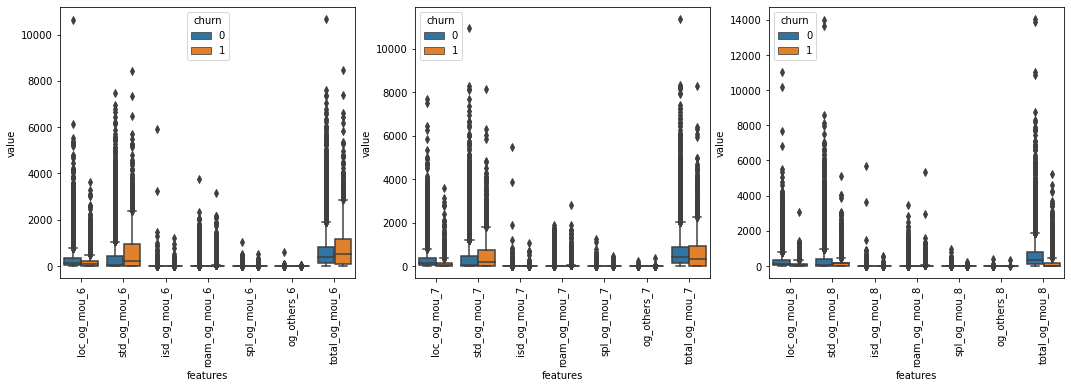

In [54]:
# plot for the outgoing calls usage
plt.figure(figsize=(18, 5))
for i in range(0,3):
    plt.subplot(1,3,i+1)
    X = pd.concat([high_value_cust[ogcalls_col[i]], high_value_cust['churn']], axis=1)
    X = pd.melt(X,id_vars="churn",var_name="features",value_name='value')
    sns.boxplot(x="features", y="value", hue="churn", data=X)
    plt.xticks(rotation=90)    

Both incoming and outgoing calls usage has outliers

In [55]:
#Calls related to minutes of usage, operators
calls = [['onnet_mou_6','offnet_mou_6','loc_ic_t2t_mou_6','loc_ic_t2m_mou_6','loc_ic_t2f_mou_6','std_ic_t2t_mou_6','std_ic_t2m_mou_6','std_ic_t2f_mou_6'],
        ['loc_og_t2t_mou_6','loc_og_t2m_mou_6','loc_og_t2f_mou_6','loc_og_t2c_mou_6','std_og_t2t_mou_6','std_og_t2m_mou_6','std_og_t2f_mou_6'],
        ['onnet_mou_7','offnet_mou_7','loc_ic_t2t_mou_7','loc_ic_t2m_mou_7','loc_ic_t2f_mou_7','std_ic_t2t_mou_7','std_ic_t2m_mou_7','std_ic_t2f_mou_7'],
        ['loc_og_t2t_mou_7','loc_og_t2m_mou_7','loc_og_t2f_mou_7','loc_og_t2c_mou_7','std_og_t2t_mou_7','std_og_t2m_mou_7','std_og_t2f_mou_7'],
        ['onnet_mou_8','offnet_mou_8','loc_ic_t2t_mou_8','loc_ic_t2m_mou_8','loc_ic_t2f_mou_8','std_ic_t2t_mou_8','std_ic_t2m_mou_8','std_ic_t2f_mou_8'],
        ['loc_og_t2t_mou_8','loc_og_t2m_mou_8','loc_og_t2f_mou_8','loc_og_t2c_mou_8','std_og_t2t_mou_8','std_og_t2m_mou_8','std_og_t2f_mou_8']]



In [56]:
for i in range(0,6):
    display(high_value_cust[calls[i]].describe())

,onnet_mou_6,offnet_mou_6,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,std_ic_t2t_mou_6,std_ic_t2m_mou_6,std_ic_t2f_mou_6
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,263.198136,377.289670,66.323845,152.364802,15.497991,15.068737,29.571656,2.735028
std,458.618668,480.458445,163.515803,218.327430,45.707070,77.672853,98.137535,19.096569
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.010000,80.710000,7.080000,31.440000,0.000000,0.000000,0.000000,0.000000
50%,92.440000,222.540000,26.960000,89.360000,2.180000,0.600000,5.730000,0.000000
75%,290.440000,487.940000,67.430000,188.710000,12.084305,9.575993,23.600000,0.300000
max,7376.710000,8362.360000,6351.440000,4693.860000,1678.410000,5459.560000,4630.230000,1351.110000


,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,std_og_t2t_mou_6,std_og_t2m_mou_6,std_og_t2f_mou_6
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.00000,30001.000000,30001.000000
mean,85.340389,164.938955,6.412256,1.595506,167.33549,181.019279,1.824058
std,228.564401,249.319357,22.109688,6.300070,403.37672,408.495914,11.977290
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,5.240000,21.840000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,26.760000,83.190000,0.230000,0.000000,4.16000,20.040000,0.000000
75%,77.980000,208.930000,4.230000,0.130000,109.61000,154.540000,0.000000
max,6431.330000,4729.740000,1466.030000,271.440000,7366.58000,8314.760000,628.560000


,onnet_mou_7,offnet_mou_7,loc_ic_t2t_mou_7,loc_ic_t2m_mou_7,loc_ic_t2f_mou_7,std_ic_t2t_mou_7,std_ic_t2m_mou_7,std_ic_t2f_mou_7
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,270.211922,381.630159,67.495933,153.542603,16.261093,15.600711,31.210154,2.838125
std,478.985086,496.930631,167.182662,217.371510,49.120774,83.020056,105.590409,19.511027
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.930000,78.540000,7.810000,34.230000,0.000000,0.000000,0.000000,0.000000
50%,90.840000,220.030000,27.590000,91.010000,2.360000,0.660000,5.940000,0.000000
75%,290.240000,494.010000,68.640000,190.660000,12.599697,10.010000,24.940000,0.360000
max,8157.780000,9667.130000,5709.590000,4171.510000,1983.010000,5800.930000,3470.380000,1136.080000


,loc_og_t2t_mou_7,loc_og_t2m_mou_7,loc_og_t2f_mou_7,loc_og_t2c_mou_7,std_og_t2t_mou_7,std_og_t2m_mou_7,std_og_t2f_mou_7
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,86.506126,164.645917,6.491575,1.914371,175.724985,189.546108,1.846009
std,240.308519,240.775379,21.930066,9.155726,420.717909,433.094558,12.978303
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.530000,23.680000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.910000,84.510000,0.280000,0.000000,4.040000,19.880000,0.000000
75%,78.340000,208.410000,4.380000,0.330000,116.610000,160.280000,0.000000
max,7400.660000,4557.140000,1196.430000,569.710000,8133.660000,9284.740000,544.630000


,onnet_mou_8,offnet_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,239.317807,342.769415,64.466909,150.477011,14.863048,14.300483,28.751539,2.643561
std,456.511907,478.207088,158.447293,213.015335,43.212092,71.288812,103.199382,19.890538
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.630000,63.190000,6.910000,31.390000,0.000000,0.000000,0.000000,0.000000
50%,80.790000,196.574803,26.990000,91.790000,2.410000,0.480000,5.290000,0.000000
75%,239.960000,438.890000,65.080000,185.730000,11.751834,9.883921,21.810000,0.510000
max,10752.560000,14007.340000,4003.210000,4643.490000,1588.530000,4309.290000,5645.860000,1394.890000


,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,79.872795,155.347376,6.030312,1.763854,151.700195,160.865626,1.626518
std,226.930657,232.000363,19.471855,7.200203,396.674676,408.117804,10.927706
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.360000,19.090000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.760000,81.560000,0.280000,0.000000,2.530000,15.530000,0.000000
75%,72.040000,196.960000,3.930000,0.510000,83.282673,117.780000,0.000000
max,10752.560000,4961.330000,928.490000,351.830000,8014.430000,13950.040000,516.910000


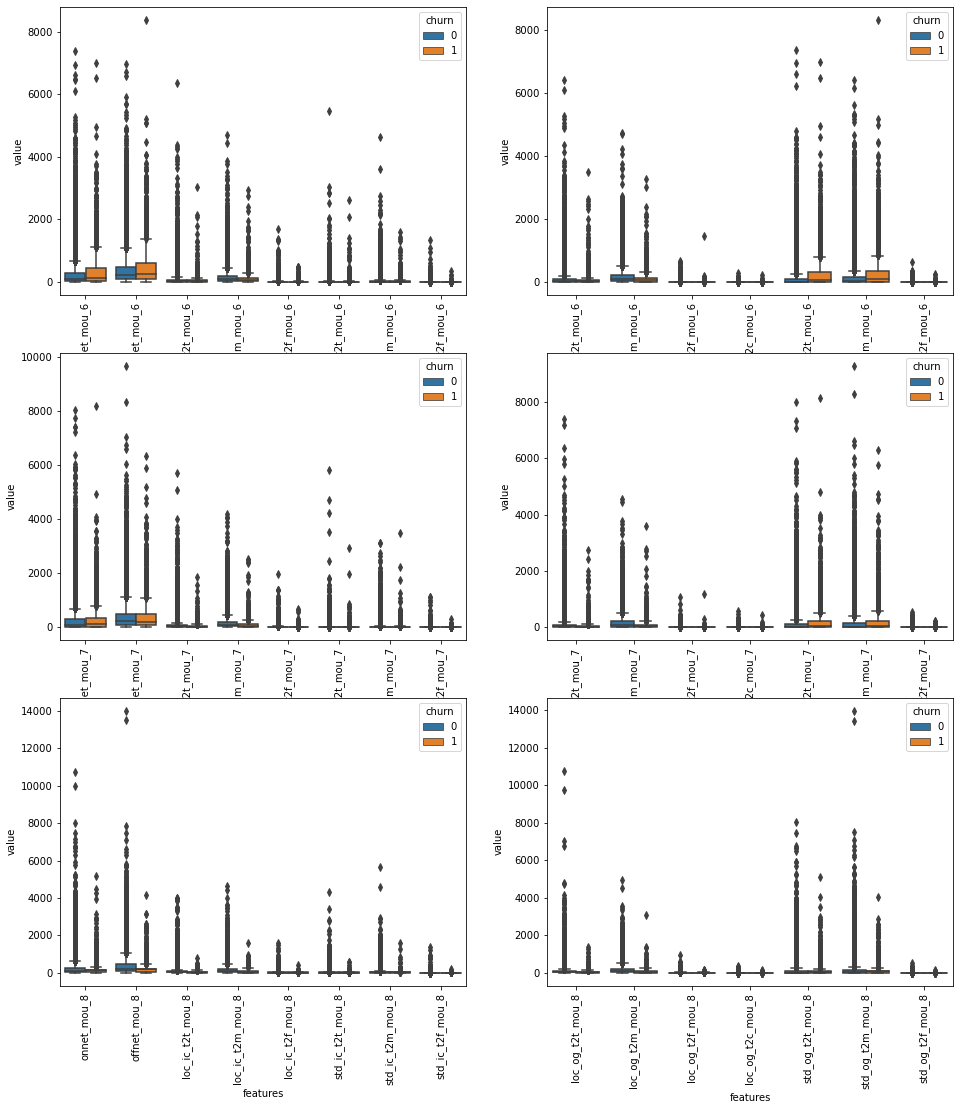

In [57]:
plt.figure(figsize=(16, 18))
for i in range(0,6):
    plt.subplot(3,2,i+1)
    X = pd.concat([high_value_cust[calls[i]], high_value_cust['churn']], axis=1)
    X = pd.melt(X,id_vars="churn",var_name="features",value_name='value')
    sns.boxplot(x="features", y="value", hue="churn", data=X)
    plt.xticks(rotation=90)    

In [58]:
high_value_cust.shape

(30001, 166)

In [59]:
exclude_cols = ['night_pck_user_6','night_pck_user_7','night_pck_user_8',
                   'fb_user_6','fb_user_7','fb_user_8',
                   'monthly_2g_6','monthly_2g_7','monthly_2g_8',
                   'monthly_3g_6','monthly_3g_7','monthly_3g_8',
                   'sachet_2g_6','sachet_2g_7','sachet_2g_8',
                   'sachet_3g_6','sachet_3g_7','sachet_3g_8',
                   'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8',
                   'spl_ic_mou_6','spl_ic_mou_7','spl_ic_mou_8','spl_og_mou_6','og_others_6','spl_og_mou_7','og_others_7','spl_og_mou_8','og_others_8',
                   'loc_og_t2c_mou_6','std_og_t2f_mou_6','std_ic_t2f_mou_6','loc_ic_t2f_mou_6',
                   'loc_og_t2c_mou_7','std_og_t2f_mou_7','std_ic_t2f_mou_7','loc_ic_t2f_mou_7',
                   'loc_og_t2c_mou_8','std_og_t2f_mou_8','std_ic_t2f_mou_8','loc_ic_t2f_mou_8',
                   'aon','churn'
                  ]
cols = list(set(high_value_cust.columns).difference(set(exclude_cols)))


In [60]:
# Remaining columns from excluded columns above have outliers. Fetching the values below 95% to remove outliers
for col in cols:
    percentiles = high_value_cust[col].quantile([0.01,0.95]).values
    high_value_cust[col][high_value_cust[col] >= percentiles[1]] = percentiles[1]

In [61]:
#high_value_cust[col][high_value_cust[col]

In [62]:
#high_value_cust.shapehead

In [63]:
#'loc_og_t2m_mou_8' in cols_to_exclud

# remove the outliers with specific columns
high_value_cust = high_value_cust.loc[~(
                    ((high_value_cust['roam_og_mou_8'] > 2200) & (high_value_cust['churn'] == 1)) |
                    ((high_value_cust['arpu_7'] > 10000) & (high_value_cust['churn'] == 1)) |
                    ((high_value_cust['loc_og_mou_8'] > 2000) & (high_value_cust['churn'] == 1)) |
                    ((high_value_cust['loc_ic_mou_7'] > 4000) & (high_value_cust['churn'] == 1)) |
                    ((high_value_cust['std_og_mou_7'] > 7000) & (high_value_cust['churn'] == 1)) |
                    ((high_value_cust['vol_2g_mb_8'] > 2500) & (high_value_cust['churn'] == 1)) 
                 )
               ]

In [64]:
high_value_cust.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,data_and_rech_6,data_and_rech_7,avg_rech_amt,churn
0,109,0.0,0.0,0.0,197.385,214.816,213.803,132.395875,133.670805,0.00,197.935577,197.045133,0.00,9.950013,7.149898,0.00,13.911337,9.818732,0.00,47.100763,46.47301,0.00,93.342088,91.397131,0.00,3.751013,3.792985,0.00,1.123056,1.3685,0.00,144.201175,141.670476,0.00,79.82987,83.299598,0.00,87.299624,90.804137,0.00,1.129011,1.11501,0.00,0.0,0.0,0.0,168.261218,175.221436,0.00,0.798277,0.776572,0.000000,3.916811,4.978279,0.00,0.454157,0.030235,0.0,0.00,0.00,0.00,47.922365,47.99052,0.16,107.47565,107.120493,4.13,12.084305,12.599697,1.15,167.491059,167.71954,5.44,9.575993,10.011904,0.00,20.72224,21.656415,0.00,2.156397,2.216923,0.00,0.0,0.0,0.0,32.457179,33.887833,0.00,0.00,0.00,5.44,0.061557,0.033585,0.0,7.460608,8.334936,0.00,0.854656,1.01296,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,614.0,504.0,559.0,1
7,109,0.0,0.0,0.0,1069.180,1261.272,1255.019,57.840000,54.680000,52.29,453.430000,567.160000,325.91,16.230000,33.490000,31.64,23.740000,12.590000,38.06,51.390000,31.38000,40.28,308.630000,447.380000,162.28,30.430000,31.130000,28.39,0.000000,0.0000,0.00,422.160000,533.910000,255.79,4.30000,23.290000,12.01,49.890000,31.760000,49.14,6.660000,20.08000,16.68,0.0,0.0,0.0,60.860000,75.140000,77.84,0.000000,0.180000,0.791247,4.500000,0.000000,6.50,0.000000,0.000000,0.0,487.53,609.24,350.16,58.140000,32.26000,27.31,217.56000,221.490000,121.19,152.160000,101.460000,39.5

In [65]:
high_value_cust.shape

(30001, 166)

In [66]:
df = high_value_cust.copy()
y = df.pop('churn')
X = df

In [67]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

<AxesSubplot:>

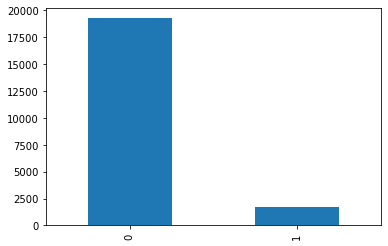

In [68]:
y_train.value_counts().plot.bar()

In [69]:
!pip3 uninstall imblearn -y

In [70]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve

In [71]:
# since the data is highly imalanced lets try to use SMOTE to handle the imbalance


sm = SMOTE(random_state=100, sampling_strategy='auto')
X_train_oversampled, y_train = sm.fit_resample(X_train, y_train)
X_train = pd.DataFrame(X_train_oversampled, columns=X_train.columns)

In [72]:
X_train.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,data_and_rech_6,data_and_rech_7,avg_rech_amt
0,109,0.0,0.0,0.0,538.930,642.486,0.000,45.39,69.73,133.018098,11.04,15.11,196.574803,0.0,0.00,7.292981,0.0,0.00,9.97189,34.86,65.71,45.887806,11.04,10.54,91.755128,0.00,2.78,3.677991,0.0,0.0,1.433821,45.91,79.04,141.328209,10.53,4.01,83.282673,0.00,1.78,89.83839,0.00,0.00,1.067792,0.0,0.0,0.0,10.53,5.79,174.191498,0.00,0.0,0.791247,0.00,0.00,5.053769,0.00,0.0,0.033372,56.44,84.84,0.00,24.03,27.59,47.211362,18.73,31.23,108.460515,0.00,6.69,11.751834,42.76,65.53,167.432575,7.34,8.43,9.883921,0.00,3.18,21.183211,19.73,0.00,2.085004,0.0,0.0,0.0,27.08,11.61,33.154735,69.84,77.14,0.00,0.00,0.0,0.040361,0.00,0.00,8.442001,0.00,0.00,0.9708,6,4,2,400,655,0,200,455,0,200,0,0,2.0,1.0,0.0,252.0,252.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,495.0,455.0,0.0,19.97,20.36,0.0,1714.34,1580.95,0.0,397.89,407.97,0.0,362.84,371.13,0.00,0.0,0.0,0.0,0,0,0,0,0,0,2,1,0,0,0,0,1.0,1.0,0.0,1063,0.0,924.05,710.02,0.0,1814.0,1110.0,1462.0
1,109,0.0,0.0,0.0,459.958,517.270,416.021,228.56,141.44,191.590000,807.89,718.26,267.590000,0.0,55.64,56.350000,0.0,104.24,100.51000,47.89,54.36,35.930000,87.18,85.23,76.540000,0.00,0.00,0.000000,0.0,0.0,0.000000,135.08,139.59,112.480000,180.66,68.38,62.240000,720.71,474.98,93.16000,0.00,0.00,0.000000,0.0,0.0,0.0,901.38,543.36,155.410000,0.00,0.0,0.000000,0.00,0.00,0.000000,0.00,0.0,0.000000,1036.46,682.96,267.89,15.49,60.21,23.790000,155.48,120.23,163.410000,0.35,0.00,0.850000,171.33,180.44,188.060000,0.00,0.00,13.740000,33.41,54.21,3.300000,0.00,0.00,0.000000,0.0,0.0,0.0,33.41,54.21,17.040000,205.93,234.76,206.11,0.31,0.0,0.000000,0.00,0.00,0.000000,0.86,0.10,1.0000,8,14,15,673,511,464,1

In [73]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train[:] = scaler.fit_transform(X_train[:])

X_train.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,data_and_rech_6,data_and_rech_7,avg_rech_amt
0,0.0,0.0,0.0,0.0,-0.074623,0.392964,-1.051770,-0.644042,-0.524353,-0.159121,-0.967466,-0.905829,-0.192851,-0.412177,-0.456390,-0.036543,-0.424868,-0.487281,-0.173351,-0.260454,0.189180,0.027615,-0.759177,-0.731022,-0.071521,-0.504002,-0.100580,0.077491,-0.273926,-0.205418,-0.018937,-0.653633,-0.470430,-0.079203,-0.559182,-0.549727,-0.105015,-0.642755,-0.602538,-0.104656,-0.145499,-0.138026,-0.008400,0.0,0.0,0.0,-0.758108,-0.723534,-0.166516,-0.390477,-0.388491,2.062145,-0.367683,-0.352346,-0.028364,-0.202374,-0.019164,-0.011785,-0.957818,-0.828408,-0.730391,-0.389336,-0.290678,0.169866,-0.783000,-0.648044,0.065725,-0.324109,-0.138486,0.026291,-0.734863,-0.575760,0.069177,-0.131652,-0.028717,0.212414,-0.712597,-0.572472,0.196025,1.036568,-0.143405,0.004980,0.0,0.0,0.0,-0.180139,-0.475343,0.156240,-0.690753,-0.598055,-0.728043,-0.371179,-0.131299,0.165590,-0.428266,-0.424230,0.467755,-0.449713,-0.415954,0.728713,-0.816866,-0.943337,-0.770932,-0.688415,0.133968,-0.987988,0.466763,2.858762,-1.032090,1.625060,-1.030854,-0.739865,0.302188,-0.194900,-0.554393,2.187945,2.265936,-0.566712,-0.561719,-0.554382,-0.471282,2.800718,1.215149,-0.401655,2.711916,2.470067,-0.571410,-0.384355,-0.343739,-0.371292,3.076702,2.823712,-0.417169,3.219586,3.45725,-0.376065,3.194410,3.449238,-0.391193,-0.129425,-0.105108,-0.091031,-0.302328,-0.303209,-0.272133,-0.404528,-0.397993,-0.326136,3.349872,1.556268,-0.261615,-0.193762,-0.165151,-0.14538,1.106042,1.164130,-0.705380,0.032229,-0.403085,3.334019,2.642669,-0.21718,1.153631,0.211526,0.767465
1,0.0,0.0,0.0,0.0,-0.319492,0.007482,0.173479,-0.113216,-0.308166

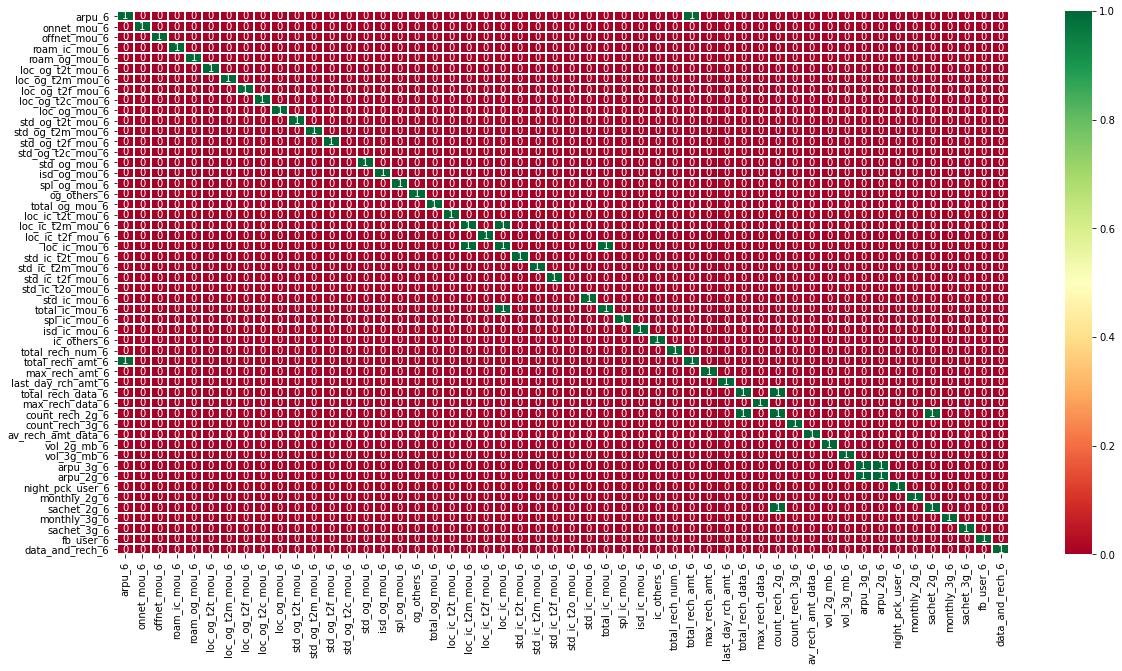

In [74]:
# Correlation matrix for month 6
mon6_cols = df.columns[df.columns.str.contains("6")]
plt.figure(figsize = (20,10))
sns.heatmap(df[mon6_cols].corr()>0.9,cmap="RdYlGn",annot=True,linewidth =1)
plt.show()

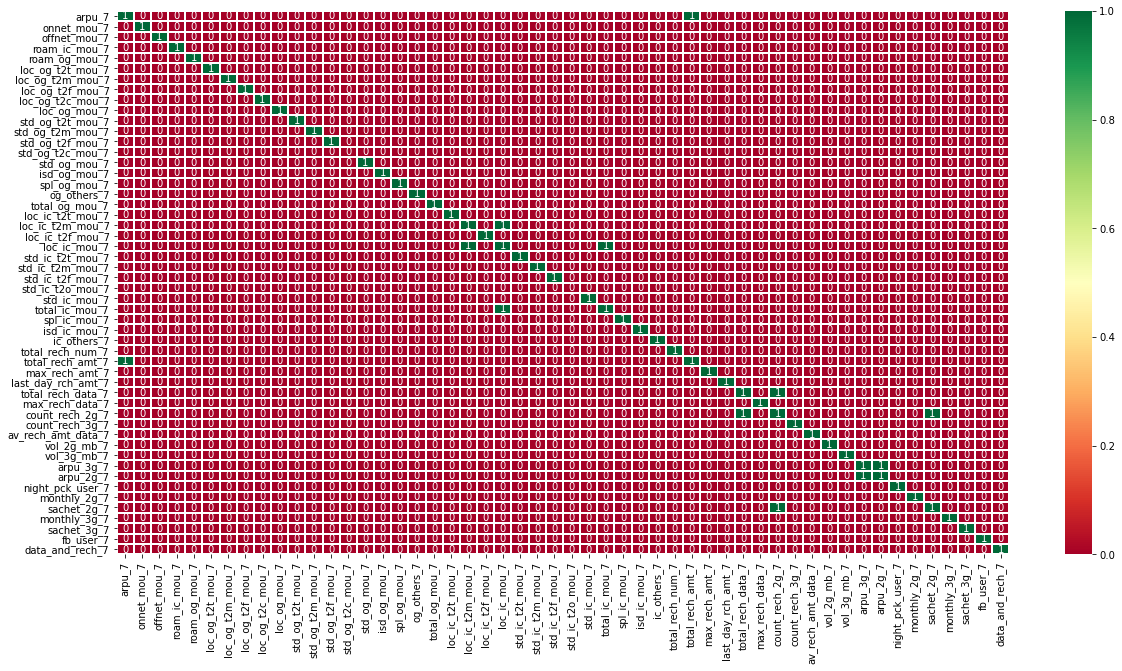

In [75]:
# Correlation matrix for month 7
mon7_cols = df.columns[df.columns.str.contains("7")]
plt.figure(figsize = (20,10)) 
sns.heatmap(df[mon7_cols].corr()>0.90,cmap="RdYlGn",annot=True,linewidth =1)
plt.show()

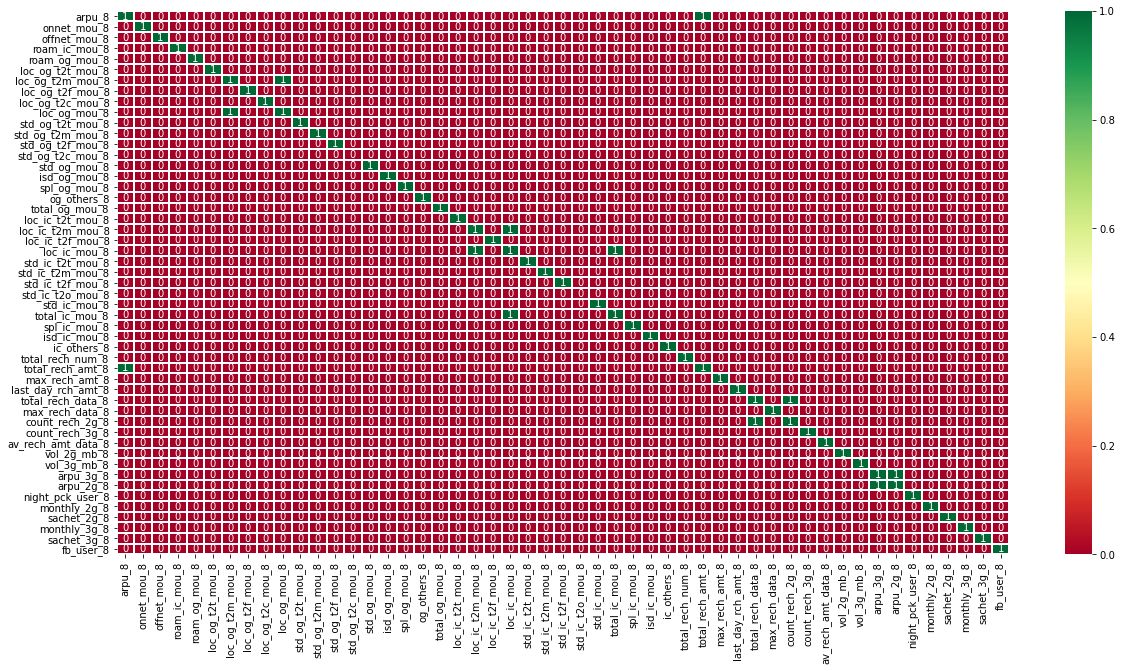

In [76]:
# Correlation matrix for month 8
mon8_cols = df.columns[df.columns.str.contains("8")]
plt.figure(figsize = (20,10)) 
sns.heatmap(df[mon8_cols].corr()>0.90,cmap="RdYlGn",annot=True,linewidth =1)
plt.show()

In [77]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
df.drop(to_drop, axis=1, inplace=True)

#negatively corelated
to_drop = [column for column in upper.columns if any(upper[column] < -0.95)]
df.drop(to_drop, axis=1, inplace=True)

### Logistic Regression to identify important variables

In [78]:
def evaluate_model(actual, pred):
    acc_score = round(accuracy_score(actual, pred)*100,2)
    print('Accuracy Score : ',acc_score)
    # ROC AUC score
    roc_score = round(roc_auc_score(actual, pred)*100,2)
    print('ROC AUC score : ',roc_score)
    # Precision score
    prec_score = round(precision_score(actual, pred)*100,2)
    print('Precision score : ', prec_score)
    # Recall score
    rec_score = round(recall_score(actual, pred)*100,2)
    print('Recall score : ', rec_score)

    return acc_score, roc_score, prec_score, rec_score

In [79]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [80]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

In [81]:
min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(
    estimator=logreg,
    step=1,
    cv=StratifiedKFold(2),
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
)

rfe = rfecv.fit(X_train, y_train)

In [82]:
col = X_train.columns[rfe.support_]

In [83]:
col

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6',
       'roam_ic_mou_7',
       ...
       'sachet_3g_8', 'fb_user_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g',
       'jun_vbc_3g', 'sep_vbc_3g', 'data_and_rech_6', 'data_and_rech_7',
       'avg_rech_amt'],
      dtype='object', length=114)

In [84]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train[col])
lr = sm.GLM(y_train,X_train_sm)
res = lr.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38520
Model:                            GLM   Df Residuals:                    38405
Model Family:                Gaussian   Df Model:                          114
Link Function:               identity   Scale:                         0.10948
Method:                          IRLS   Log-Likelihood:                -11997.
Date:                Wed, 04 May 2022   Deviance:                       4204.6
Time:                        11:55:42   Pearson chi2:                 4.20e+03
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5000      0.002    296.583      0.000       0.497       0.503
arpu_6                 0.0247      0.005      5.084      0.000       0.015       0.034
arpu_7                 0.0523      0.006      8.429      0.000       0.040       0.065
arpu_8                 0.0096      0.007      1.347      0.178      -0.004       0.023
onnet_mou_6            0.0326      0.006      5.588      0.000       0.021       0.044
onnet_mou_7            0.0203      0.011      1.922      0.055      -0.000       0.041
onnet_mou_8            0.0137      0.010      1.424      0.155      -0.005       0.033
offnet_mou_7           0.0716      0.010      7.183      0.000       0.052       0.091
offnet_mou_8          -0.0155      0.009     -1.822      0.068      -0.032       0.001
roam_ic_mou_6         -0.0117      0.002     -5.146      0.000      -0.016      -0.007
roam_ic_mou_7          0.0164      0.004      4.459      0.000       0.009       0.024
roam_og_mou_7         -0.0121      0.004     -3.184      0.001      -0.019      -0.005
roam_og_mou_8          0.0730      0.003     29.113      0.000       0.068       0.078
loc_og_t2t_mou_7       0.0189      0.006      3.248      0.001       0.007       0.030
loc_og_t2t_mou_8      -0.0465      0.006     -8.046      0.000      -0.058      -0.035
loc_og_t2m_mou_6      -0.0204      0.007     -2.954      0.003      -0.034      -0.007
loc_og_t2m_mou_7       0.0216      0.010      2.206      0.027       0.002       0.041
loc_og_t2m_mou_8      -0.0539      0.009     -5.711      0.000      -0.072      -0.035
loc_og_t2f_mou_7      -0.0148      0.002     -7.045      0.000      -0.019      -0.011
loc_og_mou_6           0.0053      0.009      0.559      0.576      -0.013       0.024
loc_og_mou_7          -0.0683      0.013     -5.087      0.000      -0.095      -0.042
loc_og_mou_8           0.0993      0.013      7.891      0.000       0.075       0.124
std_og_t2t_mou_7      -0.0319      0.011     -2.975      0.003      -0.053      -0.011
std_og_t2t_mou_8      -0.0333      0.010     -3.352      0.001      -0.053      -0.014
std_og_t2m_mou_6       0.0031      0.006      0.520      0.603      -0.009       0.015
std_og_t2m_mou_7      -0.0473      0.010     -4.645      0.000      -0.067      -0.027
std_og_t2m_mou_8      -0.0056      0.008     -0.666      0.505      -0.022       0.011
std_og_t2f_mou_7      -0.0113      0.002     -6.021      0.000      -0.015      -0.008
std_og_mou_6           0.0330      0.013      2.622      0.009       0.008       0.058
std_og_mou_7           0.0069      0.015      0.446      0.656      -0.023       0.037
std_og_mou_8           0.0707      0.013      5.322      0.000       0.045       0.097
isd_og_mou_8           0.0874      0.003     27.590      0.000       0.081       0.094
og_others_6           -0.0029      0.0

In [85]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

0    1.015347
1    0.748519
2    0.154974
3    0.418652
4    0.391846
5    0.877336
6    0.423367
7    0.226384
8    0.221786
9    0.745887
dtype: float64

In [86]:
y_train_pred_final = pd.DataFrame({'Churn':y_train, 'Churn_Prob':y_train_pred})
y_train_pred_final.head()

,Churn,Churn_Prob
0,1,1.015347
1,0,0.748519
2,0,0.154974
3,0,0.418652
4,0,0.391846


In [87]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,1,1.015347,1
1,0,0.748519,1
2,0,0.154974,0
3,0,0.418652,0
4,0,0.391846,0


In [88]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[16687  2573]
 [ 2290 16970]]


In [89]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8737538940809969


In [90]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [91]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [92]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

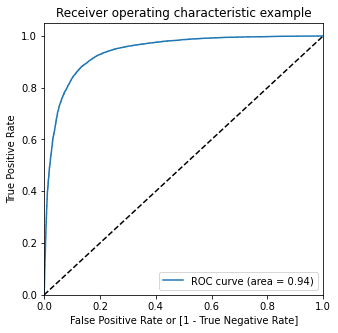

In [93]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

In [94]:
# Creating columns with all probabilities
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,1.015347,1,1,1,1,1,1,1,1,1,1,1
1,0,0.748519,1,1,1,1,1,1,1,1,1,0,0
2,0,0.154974,0,1,1,0,0,0,0,0,0,0,0
3,0,0.418652,0,1,1,1,1,1,0,0,0,0,0
4,0,0.391846,0,1,1,1,1,0,0,0,0,0,0


In [95]:
# Now let's calculate accuracy, sensitivity and specificity 
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.597456  0.997508  0.197404
0.1   0.1  0.658619  0.995016  0.322222
0.2   0.2  0.730789  0.988058  0.473520
0.3   0.3  0.802492  0.970717  0.634268
0.4   0.4  0.855841  0.941745  0.769938
0.5   0.5  0.873754  0.881101  0.866407
0.6   0.6  0.857347  0.793666  0.921028
0.7   0.7  0.818847  0.681931  0.955763
0.8   0.8  0.745379  0.512357  0.978401
0.9   0.9  0.667471  0.344548  0.990395


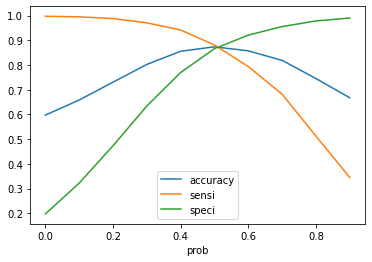

In [96]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.5 is the optimum point to take it as a cutoff probability.

In [97]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,1.015347,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.748519,1,1,1,1,1,1,1,1,1,0,0,1
2,0,0.154974,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.418652,0,1,1,1,1,1,0,0,0,0,0,0
4,0,0.391846,0,1,1,1,1,0,0,0,0,0,0,0


In [98]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.8737538940809969

In [99]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.8683416056900168

In [100]:
recall_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.8811007268951194

In [101]:
X_test[:] = scaler.transform(X_test[:])
X_test = X_test[col]
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_7,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_7,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_8,og_others_6,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,count_rech_2g_7,count_rech_2g_8,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,data_and_rech_6,data_and_rech_7,avg_rech_amt
7526,1.0,-0.156184,0.617276,1.578619,-0.670703,-0.541447,-0.463795,0.106135,0.186292,-0.412177,-0.456390,-0.487281,-0.545706,-0.013587,0.157955,2.002471,1.674470,1.340221,0.007897,1.155315,1.047971,0.914255,-0.516645,-0.498213,-0.639613,-0.601721,-0.463292,-0.138026,-0.773737,-0.703962,-0.578653,-0.562540,0.154286,-0.259962,-0.214871,-0.002991,0.190188,-0.030324,-0.460775,0.751186,1.221422,0.596030,0.047061,0.032653,0.528169,0.772864,0.244967,-0.511908,0.619676,-0.080518,-0.506126,0.637167,0.149230,-0.143405,-0.030927,-0.221772,-0.273876,0.550406,0.326804,0.524425,0.373337,-0.227857,-0.477692,-0.675856,0.185498,0.279797,0.598101,1.628730,-0.210182,0.082946,0.619486,-0.345194,1.199676,-0.704636,-0.194900,0.045270,-0.728734,1.115018,-0.021399,-0.471282,-0.495315,1.575426,-0.750663,-0.495313,-0.228730,-0.351077,-0.507258,-0.479572,-0.427700,4.007948,-0.509881,0.061175,3.878203,-0.091031,-0.302328,2.528902,-0.272133,-0.404528,-0.397993,-0.326136,-0.317673,-0.301588,1.802162,-0.193762,-0.165151,-0.14538,1.490123,2.545319,0.905611,-0.102263,0.611219,5.291303,-0.682606,0.055733,-0.391332
74907,1.0,-1.084838,-0.902263,-1.051770,-0.775582,-0.734571,-0.159121,-0.922679,-0.192851,-0.412177,-0.456390,-0.487281,-0.173351,-0.684516,0.027615,-0.831425,-0.783329,-0.071521,-0.497380,-0.850324,-0.809866,-0.079203,-0.563574,-0.105015,-0.642755,-0.608862,-0.104656,-0.138026,-0.778301,-0.735075,-0.166516,2.062145,-0.202374,-1.049909,-0.958090,-0.730391,-0.806532,-0.787784,0.169866,-0.928047,-0.897494,0.065725,-0.301388,0.026291,-0.955770,-0.921703,0.069177,-0.614537,0.212414,-0.712597,-0.681787,0.196025,-0.138411,-0.143405,0.004980,-0.767329,-0.725507,0.156240,-0.983725,-0.925127,-0.728043,0.165590,0.467755,-1.521916,-0.661128,-0.770932,-0.701471,-0.987988,0.955669,0.986700,2.351308,-1.030854,-0.739865,-0.201224,-0.194900,-0.554393,2.187945,2.265936,-0.554382,-0.471282,1.215149,-0.401655,1.012104,-0.238616,2.517860,-0.371292,-0.380067,1.492959,1.583901,-0.376065,1.656196,1.770048,-0.391193,-0.091031,-0.302328,-0.303209,-0.272133,-0.404528,-0.397993,-0.326136,1.516100,1.556268,-0.261615,-0.193762,-0.165151,-0.14538,-0.705380,-0.980629,-0.347374,2.142282,-0.206218,-0.217180,-0.753958,-0.508342,-0.786013
99617,1.0,-0.288956,-0.765136,-1.019668,-0.453354,-0.637557,-0.674682,-0.656092,-0.829894,-0.211597,3.376625,3.118349,-0.022566,-0.684516,-0.6

In [102]:
y_test_pred = res.predict(X_test_sm)

In [103]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [104]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [105]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [106]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [107]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.1 else 0)

In [108]:
y_pred_final.head()

,churn,Churn_Prob,final_predicted
0,0,-0.140216,0
1,1,0.936311,1
2,0,0.657600,1
3,0,0.058935,0
4,0,0.497855,1


In [109]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.churn, y_pred_final.final_predicted)

0.375180535496056

In [110]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8811007268951194

In [111]:
# Let us calculate specificity
TN / float(TN+FP)

0.8664070612668744

In [112]:
from sklearn.metrics import roc_auc_score
# List to store the model scores
model_score_list = []

# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_pred_final.churn, y_pred_final.final_predicted)
# add the model scores to score list 
model_score_list.append({'model_name':'LogisticRegression+rfe', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})
model_score_list

Accuracy Score :  37.52
ROC AUC score :  64.62
Precision score :  10.8
Recall score :  96.72


[{'model_name': 'LogisticRegression+rfe',
  'acc_score': 37.52,
  'roc_score': 64.62,
  'precision_score': 10.8,
  'recall_score': 96.72}]

### precision and recall is very low. Will work on PCA to get model performance

In [113]:
df1 = high_value_cust.copy()
y = df1.pop('churn')
X = df1

# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
    

X = StandardScaler().fit_transform(X_train)

In [114]:
from sklearn.decomposition import PCA
pca  = PCA(random_state = 42)
pca.fit(X)

PCA(random_state=42)

In [115]:
pca.components_

array([[-1.65387318e-19,  1.66533454e-16, -3.33066907e-16, ...,
         5.17411136e-02,  5.74823748e-02,  6.88246342e-02],
       [ 3.31154785e-20, -1.07552856e-16,  1.38777878e-16, ...,
         7.13858814e-02,  7.16822958e-02,  8.42362224e-02],
       [-1.27149358e-20,  4.07660017e-17,  6.07153217e-17, ...,
         6.82630378e-02,  8.65305883e-02,  9.32542362e-02],
       ...,
       [-0.00000000e+00, -2.83483659e-02, -3.12981777e-02, ...,
        -8.67361738e-17,  1.04083409e-17,  1.35308431e-16],
       [ 9.99995574e-01,  1.62747358e-04, -2.95539697e-03, ...,
         4.82469967e-18,  3.03576608e-18,  1.08420217e-18],
       [ 0.00000000e+00,  4.00893923e-02,  7.81812782e-03, ...,
         9.28077060e-17, -5.72458747e-17, -8.06646416e-17]])

In [116]:
pca.explained_variance_ratio_

array([1.34172279e-01, 1.13862984e-01, 6.88770986e-02, 5.39795025e-02,
       3.80052608e-02, 2.76454970e-02, 2.64790597e-02, 2.38766775e-02,
       2.24368635e-02, 2.17058901e-02, 2.00947212e-02, 1.82363698e-02,
       1.65882955e-02, 1.58181315e-02, 1.52572038e-02, 1.46873961e-02,
       1.43304414e-02, 1.34735438e-02, 1.28234732e-02, 1.13598607e-02,
       1.08386467e-02, 1.07012899e-02, 9.89347653e-03, 9.70017974e-03,
       9.21194704e-03, 8.44287516e-03, 8.35555188e-03, 8.07279587e-03,
       7.89499423e-03, 7.52710903e-03, 7.51333925e-03, 6.93644044e-03,
       6.79476069e-03, 6.67630885e-03, 6.08421693e-03, 5.91575587e-03,
       5.63713270e-03, 5.51651955e-03, 5.30975793e-03, 5.20855244e-03,
       5.08921293e-03, 4.94402011e-03, 4.89506016e-03, 4.46937438e-03,
       4.40838021e-03, 4.27543861e-03, 4.10515464e-03, 4.05950551e-03,
       3.88000038e-03, 3.78396558e-03, 3.75617041e-03, 3.65825686e-03,
       3.59823505e-03, 3.46535230e-03, 3.39917323e-03, 3.06175453e-03,
      

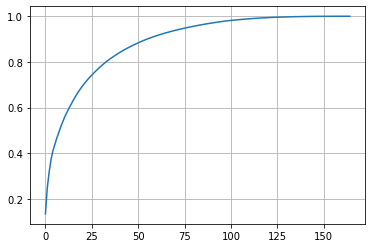

In [117]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid()
plt.show()

In [118]:
# from th e above plot we can identify the n_componets to be 50
n_component = 50
pca_final = PCA(n_components=n_component)
x_train_pca = pca_final.fit_transform(X)
x_train_pca.shape

(21000, 50)

In [119]:
x_test_pca = pca_final.transform(X_test)
x_test_pca.shape

(9001, 50)

In [120]:
lr = LogisticRegression()
lr.fit(x_train_pca, y_train)

LogisticRegression()

In [121]:
y_pca_pred = lr.predict(x_test_pca)

In [122]:
metrics.confusion_matrix(y_test, y_pca_pred)

array([[6574, 1677],
       [ 233,  517]])

In [123]:
#getting the metrics
print(metrics.classification_report(y_test, y_pca_pred))

              precision    recall  f1-score   support

           0       0.97      0.80      0.87      8251
           1       0.24      0.69      0.35       750

    accuracy                           0.79      9001
   macro avg       0.60      0.74      0.61      9001
weighted avg       0.90      0.79      0.83      9001



For an imbalanced class dataset F1 score is a more appropriate metric. This has now improved compared to previous score using logistic regression, lets now try to other model and see if we get better results

In [124]:
# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, y_pca_pred)
# add the model scores to score list 
model_score_list.append({'model_name':'LogisticRegression+PCA', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})
model_score_list

Accuracy Score :  78.78
ROC AUC score :  74.3
Precision score :  23.56
Recall score :  68.93


[{'model_name': 'LogisticRegression+rfe',
  'acc_score': 37.52,
  'roc_score': 64.62,
  'precision_score': 10.8,
  'recall_score': 96.72},
 {'model_name': 'LogisticRegression+PCA',
  'acc_score': 78.78,
  'roc_score': 74.3,
  'precision_score': 23.56,
  'recall_score': 68.93}]

random forest classifier

In [125]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train_pca, y_train)
display(rfc.score(x_train_pca, y_train))

1.0

In [126]:
y_pca_pred = rfc.predict(x_test_pca)

In [127]:
#getting the metrics
print(metrics.classification_report(y_test, y_pca_pred))

              precision    recall  f1-score   support

           0       0.93      0.23      0.36      8251
           1       0.09      0.82      0.16       750

    accuracy                           0.28      9001
   macro avg       0.51      0.52      0.26      9001
weighted avg       0.86      0.28      0.35      9001



We can see that randome forrest is not doing better job predicting the 'churn' compared to Logistic regression+PCA, lets try hyperparameter tunning to see

In [128]:
# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, y_pca_pred)
# add the model scores to score list 
model_score_list.append({'model_name':'random forest + PCA"', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})
model_score_list

Accuracy Score :  27.63
ROC AUC score :  52.34
Precision score :  8.79
Recall score :  82.0


[{'model_name': 'LogisticRegression+rfe',
  'acc_score': 37.52,
  'roc_score': 64.62,
  'precision_score': 10.8,
  'recall_score': 96.72},
 {'model_name': 'LogisticRegression+PCA',
  'acc_score': 78.78,
  'roc_score': 74.3,
  'precision_score': 23.56,
  'recall_score': 68.93},
 {'model_name': 'random forest + PCA"',
  'acc_score': 27.63,
  'roc_score': 52.34,
  'precision_score': 8.79,
  'recall_score': 82.0}]

In [129]:
%%time
# Hyper parameter tunning

from sklearn.model_selection import RandomizedSearchCV


min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]
param_dist = {'n_estimators': [500,600,700,800,1000, 1100, 1200],
               'max_features': ['log2', 'sqrt'],
               'criterion': ['gini'],
               'max_depth': [5,6,7,8,9,10,11,12,13,14,15],
               'min_samples_split': [10,15, 20, 25],
               'min_samples_leaf': [2,3,5,8,13,21,25,30,35],
               'bootstrap': bootstrap}
rs = RandomizedSearchCV(rfc, 
                        param_dist, 
                        n_iter = 50, 
                        cv = 3, 
                        verbose = 10, 
                        n_jobs=-1, 
                        random_state=0)
rs.fit(x_train_pca, y_train)
rs.best_params_

Fitting 3 folds for each of 50 candidates, totalling 150 fits
CPU times: user 1min 48s, sys: 482 ms, total: 1min 49s
Wall time: 19min 24s


{'n_estimators': 800,
 'min_samples_split': 20,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 13,
 'criterion': 'gini',
 'bootstrap': False}

In [130]:
{'n_estimators': 700, 'min_samples_split': 15, 'min_samples_leaf': 3, 'max_features': 'sqrt', 
 'max_depth': 15, 'criterion': 'gini', 'bootstrap': False}

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 3,
 'max_features': 'sqrt',
 'max_depth': 15,
 'criterion': 'gini',
 'bootstrap': False}

In [131]:
rfco = RandomForestClassifier(n_estimators=700, min_samples_split = 15, min_samples_leaf=3,  max_depth= 15, criterion='gini', 
                              bootstrap= False, max_features='sqrt')
rfco.fit(x_train_pca, y_train)
display(rfco.score(x_train_pca, y_train))

0.976047619047619

In [132]:
y_pca_pred = rs.predict(x_test_pca)
#getting the metrics
print(metrics.classification_report(y_test, y_pca_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      8251
           1       0.00      0.00      0.00       750

    accuracy                           0.92      9001
   macro avg       0.46      0.50      0.48      9001
weighted avg       0.84      0.92      0.88      9001



In [133]:
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, y_pca_pred)
# add the model scores to score list 
model_score_list.append({'model_name':'random forest +hyper param tuning"', 
                         'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})
model_score_list

Accuracy Score :  91.67
ROC AUC score :  50.0
Precision score :  0.0
Recall score :  0.0


[{'model_name': 'LogisticRegression+rfe',
  'acc_score': 37.52,
  'roc_score': 64.62,
  'precision_score': 10.8,
  'recall_score': 96.72},
 {'model_name': 'LogisticRegression+PCA',
  'acc_score': 78.78,
  'roc_score': 74.3,
  'precision_score': 23.56,
  'recall_score': 68.93},
 {'model_name': 'random forest + PCA"',
  'acc_score': 27.63,
  'roc_score': 52.34,
  'precision_score': 8.79,
  'recall_score': 82.0},
 {'model_name': 'random forest +hyper param tuning"',
  'acc_score': 91.67,
  'roc_score': 50.0,
  'precision_score': 0.0,
  'recall_score': 0.0}]

### XGBoosting

In [134]:
# lets try boosting
import xgboost as xgb
xgclf = xgb.XGBClassifier()

xgclf.fit(x_train_pca, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [135]:
y_pca_pred = xgclf.predict(x_test_pca)
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, y_pca_pred)
# add the model scores to score list 
model_score_list.append({'model_name':'XG Boost"', 'acc_score':acc_score, 
                         'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})
model_score_list

Accuracy Score :  67.2
ROC AUC score :  54.54
Precision score :  10.57
Recall score :  39.33


[{'model_name': 'LogisticRegression+rfe',
  'acc_score': 37.52,
  'roc_score': 64.62,
  'precision_score': 10.8,
  'recall_score': 96.72},
 {'model_name': 'LogisticRegression+PCA',
  'acc_score': 78.78,
  'roc_score': 74.3,
  'precision_score': 23.56,
  'recall_score': 68.93},
 {'model_name': 'random forest + PCA"',
  'acc_score': 27.63,
  'roc_score': 52.34,
  'precision_score': 8.79,
  'recall_score': 82.0},
 {'model_name': 'random forest +hyper param tuning"',
  'acc_score': 91.67,
  'roc_score': 50.0,
  'precision_score': 0.0,
  'recall_score': 0.0},
 {'model_name': 'XG Boost"',
  'acc_score': 67.2,
  'roc_score': 54.54,
  'precision_score': 10.57,
  'recall_score': 39.33}]

In [136]:
#getting the metrics
print(metrics.classification_report(y_test, y_pca_pred))

              precision    recall  f1-score   support

           0       0.93      0.70      0.80      8251
           1       0.11      0.39      0.17       750

    accuracy                           0.67      9001
   macro avg       0.52      0.55      0.48      9001
weighted avg       0.86      0.67      0.74      9001



### Using Grid SearchCV 

In [137]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
depth=[1, 5, 10, 50, 100, 500]
sample_split=[5, 10, 100, 500] 
param_grid = {'max_depth':depth,'min_samples_split':sample_split} 
model_dt1 = GridSearchCV(DecisionTreeClassifier(class_weight='balanced'), param_grid, scoring = 'roc_auc', cv=5) 
model_dt1.fit(x_train_pca, y_train) 
y_pca_pred = model_dt1.predict(x_test_pca)

In [138]:
print(model_dt1.best_estimator_)


DecisionTreeClassifier(class_weight='balanced', max_depth=50,
                       min_samples_split=500)


In [139]:
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, y_pca_pred)
# add the model scores to score list 
model_score_list.append({'model_name':'GridSearchCV"', 'acc_score':acc_score, 
                         'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})
model_score_list

Accuracy Score :  22.62
ROC AUC score :  55.31
Precision score :  9.29
Recall score :  94.53


[{'model_name': 'LogisticRegression+rfe',
  'acc_score': 37.52,
  'roc_score': 64.62,
  'precision_score': 10.8,
  'recall_score': 96.72},
 {'model_name': 'LogisticRegression+PCA',
  'acc_score': 78.78,
  'roc_score': 74.3,
  'precision_score': 23.56,
  'recall_score': 68.93},
 {'model_name': 'random forest + PCA"',
  'acc_score': 27.63,
  'roc_score': 52.34,
  'precision_score': 8.79,
  'recall_score': 82.0},
 {'model_name': 'random forest +hyper param tuning"',
  'acc_score': 91.67,
  'roc_score': 50.0,
  'precision_score': 0.0,
  'recall_score': 0.0},
 {'model_name': 'XG Boost"',
  'acc_score': 67.2,
  'roc_score': 54.54,
  'precision_score': 10.57,
  'recall_score': 39.33},
 {'model_name': 'GridSearchCV"',
  'acc_score': 22.62,
  'roc_score': 55.31,
  'precision_score': 9.29,
  'recall_score': 94.53}]

Final results of the the different models we analysed

In [140]:
metricsdf = pd.DataFrame(model_score_list)
metricsdf

,model_name,acc_score,roc_score,precision_score,recall_score
0,LogisticRegression+rfe,37.52,64.62,10.80,96.72
1,LogisticRegression+PCA,78.78,74.30,23.56,68.93
2,"random forest + PCA""",27.63,52.34,8.79,82.00
3,"random forest +hyper param tuning""",91.67,50.00,0.00,0.00
4,"XG Boost""",67.20,54.54,10.57,39.33
5,"GridSearchCV""",22.62,55.31,9.29,94.53


### recommend strategies

Text(0.5, 0, 'Random Forest Feature Importance')

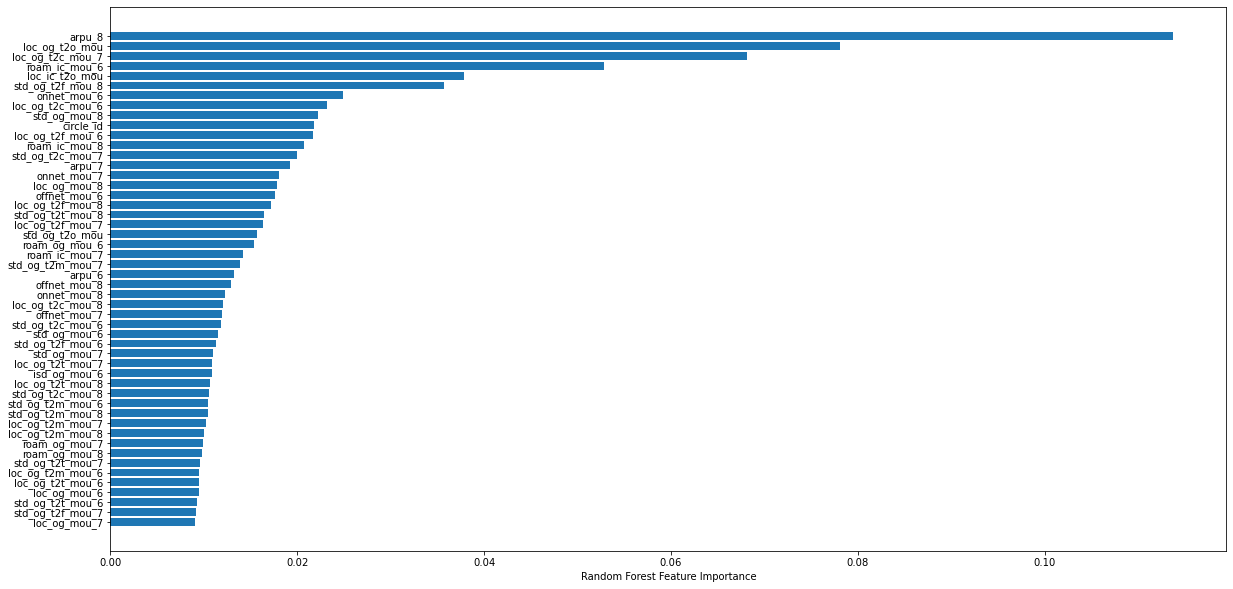

In [141]:
sorted_idx = rfco.feature_importances_.argsort()
plt.figure(figsize = (20,10))  
plt.barh(high_value_cust.columns[sorted_idx], rfco.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

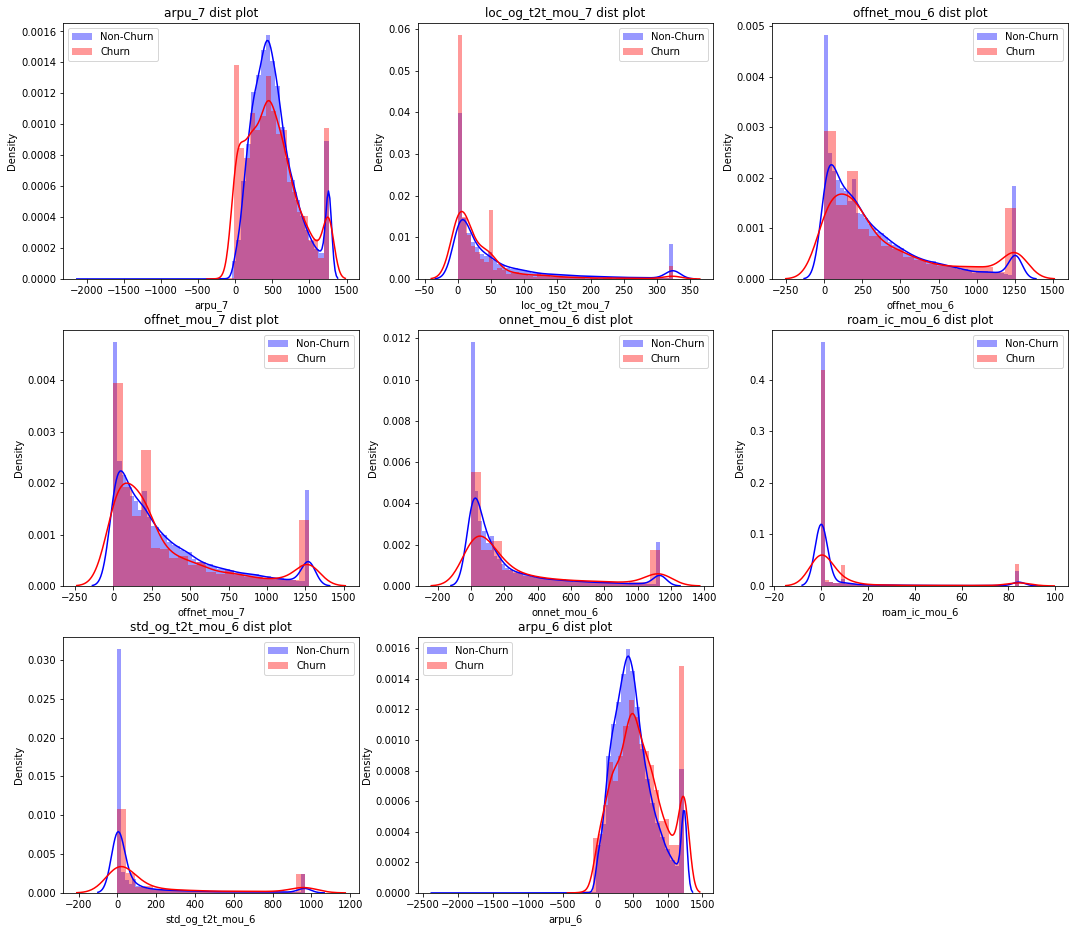

In [142]:
# Data preparation
data = high_value_cust.copy()

#selected final list of features
cols = ['arpu_7','loc_og_t2t_mou_7','offnet_mou_6','offnet_mou_7', 'onnet_mou_6', 'roam_ic_mou_6','std_og_t2t_mou_6','arpu_6']

data = data[cols]
data['churn'] = high_value_cust['churn']

plt.figure(figsize=(18,16))

for i, col in enumerate(cols):

    plt.subplot(3,3,i+1)
    ax = sns.distplot(data.loc[data['churn']==0, [col]], color='b', label='Non-Churn')
    ax = sns.distplot(data.loc[data['churn']==1, [col]], color='r', label='Churn')
    ax.legend()
    plt.xlabel(col)
    plt.title('{0} dist plot'.format(col))